# Implementation of LeNet-5 for Bangla Handwritten Digit Recognition

*The Paper: [[LeCun et al., 1998. Gradient-Based Learning Applied to Document Recognition]](http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf)*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import OneHotEncoder

%matplotlib inline

In [2]:
# Loading the dataset
X_train_orig = pd.read_json('./dataset/train_images.json', ' ').to_numpy()
Y_train_orig = pd.read_json('./dataset/train_labels.json', ' ').to_numpy()
X_test_orig = pd.read_json('./dataset/test_images.json', ' ').to_numpy()
Y_test_orig = pd.read_json('./dataset/test_labels.json', ' ').to_numpy()

[5]


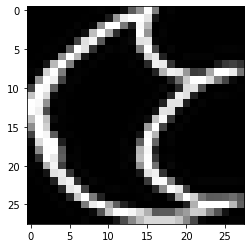

In [3]:
# Checking up some data
index = 183
temp_x_data = X_train_orig[index].reshape(28, 28)
temp_y_data = Y_train_orig[index]

plt.imshow(temp_x_data, cmap='gray')
print(temp_y_data)

In [4]:
# Setting up the label
Y_train = tf.one_hot(Y_train_orig, 10, axis=1)[:,:,0]
Y_test = tf.one_hot(Y_test_orig, 10, axis=1)[:,:,0]

# Normalizing the dataset
X_test = X_test_orig.reshape(X_test_orig.shape[0], 28, 28, 1) / 255
X_train = X_train_orig.reshape(X_train_orig.shape[0], 28, 28, 1) / 255

# Checking the shape of the dataset
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(23824, 28, 28, 1)
(23824, 10)
(2653, 28, 28, 1)
(2653, 10)


## Model Architecture

|     Layers    | Feature Map |  Size | Kernel Size | Stride | Padding | Activation |
|:-------------:|:-----------:|:-----:|:-----------:|:------:|:-------:|:----------:|
| Input - Image |      1      | 28x28 |      -      |    -   |    -    |      -     |
|    Conv2D-1   |      6      | 28x28 |     5x5     |    1   |   SAME  |    tanh    |
|  AvgPool2D-2  |      6      | 14x14 |     2x2     |    2   |    -    |      -     |
|    Conv2D-3   |      16     | 10x10 |     5x5     |    1   |    -    |    tanh    |
|  AvgPool2D-4  |      16     |  5x5  |     2x2     |    2   |    -    |      -     |
|    Conv2D-5   |     120     |  1x1  |     5x5     |    1   |    -    |    tanh    |
|      FC-6     |      -      |   84  |      -      |    -   |    -    |    tanh    |
|      FC-7     |      -      |   10  |      -      |    -   |    -    |   softmax  |

> AS the model works on 32x32x1 size images, I had to use SAME padding to make my 28x28 images work.

In [5]:
# Some hyperparameters
batch_size = 64
epochs = 10

In [6]:
model = keras.Sequential()

model.add(tf.keras.Input(shape=(28,28,1), name='digits'))
model.add(keras.layers.Conv2D(6, (5,5), padding="same", activation="tanh"))
model.add(keras.layers.AvgPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(keras.layers.Conv2D(16, (5,5), activation="tanh"))
model.add(keras.layers.AvgPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(keras.layers.Conv2D(120, (5,5), activation="tanh"))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(84, activation="tanh"))
model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(optimizer="Adam", loss=keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])

history = model.fit(X_train, Y_train, epochs=epochs, validation_data=(X_test, Y_test), batch_size=batch_size, validation_batch_size=batch_size)

Epoch 1/10
373/373 [==============================] - 7s 19ms/step - loss: 0.3164 - accuracy: 0.9057 - val_loss: 0.1454 - val_accuracy: 0.9548
Epoch 2/10
373/373 [==============================] - 7s 19ms/step - loss: 0.1003 - accuracy: 0.9699 - val_loss: 0.0864 - val_accuracy: 0.9744
Epoch 3/10
373/373 [==============================] - 7s 19ms/step - loss: 0.0636 - accuracy: 0.9803 - val_loss: 0.0772 - val_accuracy: 0.9766
Epoch 4/10
373/373 [==============================] - 7s 18ms/step - loss: 0.0467 - accuracy: 0.9863 - val_loss: 0.0605 - val_accuracy: 0.9834
Epoch 5/10
373/373 [==============================] - 7s 19ms/step - loss: 0.0377 - accuracy: 0.9887 - val_loss: 0.0558 - val_accuracy: 0.9823
Epoch 6/10
373/373 [==============================] - 7s 18ms/step - loss: 0.0275 - accuracy: 0.9922 - val_loss: 0.0584 - val_accuracy: 0.9819
Epoch 7/10
373/373 [==============================] - 7s 19ms/step - loss: 0.0227 - accuracy: 0.9936 - val_loss: 0.0593 - val_accuracy: 0.9793

83/83 [==============================] - 0s 5ms/step - loss: 0.0533 - accuracy: 0.9830
test loss, test acc: [0.0533314011991024, 0.983038067817688]


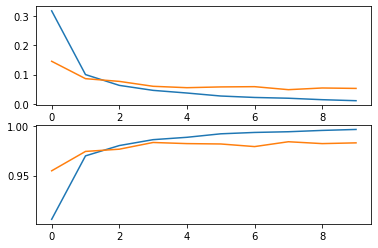

In [7]:
results = model.evaluate(X_test, Y_test)
print('test loss, test acc:', results)

fig, (plt1, plt2) = plt.subplots(2,1)

plt1.plot(history.history["loss"])
plt1.plot(history.history["val_loss"])

plt2.plot(history.history["accuracy"])
plt2.plot(history.history["val_accuracy"])
plt.show()

The implementation of LeNet-5 for Bangla Handwritten Digit Recognition finishes here.

As this is a very old paper, some of the new technologies came recently to that may increase the accuracy. I'm going to try them here.

In [8]:
model2 = keras.Sequential()

model2.add(tf.keras.Input(shape=(28,28,1), name='digits'))
model2.add(keras.layers.Conv2D(6, (5,5), padding="same", activation="relu"))
model2.add(keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model2.add(keras.layers.Conv2D(16, (5,5), activation="relu"))
model2.add(keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model2.add(keras.layers.Conv2D(120, (5,5), activation="relu"))
model2.add(keras.layers.Flatten())
model2.add(keras.layers.Dense(84, activation="relu"))
model2.add(keras.layers.Dense(10, activation="softmax"))

model2.compile(optimizer="Adam", loss=keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])

history2 = model2.fit(X_train, Y_train, epochs=epochs, validation_data=(X_test, Y_test), batch_size=batch_size, validation_batch_size=batch_size)

Epoch 1/10
373/373 [==============================] - 7s 20ms/step - loss: 0.3394 - accuracy: 0.8958 - val_loss: 0.1395 - val_accuracy: 0.9593
Epoch 2/10
373/373 [==============================] - 7s 20ms/step - loss: 0.0900 - accuracy: 0.9733 - val_loss: 0.1004 - val_accuracy: 0.9691
Epoch 3/10
373/373 [==============================] - 7s 20ms/step - loss: 0.0622 - accuracy: 0.9811 - val_loss: 0.0754 - val_accuracy: 0.9808
Epoch 4/10
373/373 [==============================] - 7s 19ms/step - loss: 0.0433 - accuracy: 0.9869 - val_loss: 0.0728 - val_accuracy: 0.9796
Epoch 5/10
373/373 [==============================] - 7s 18ms/step - loss: 0.0372 - accuracy: 0.9884 - val_loss: 0.0622 - val_accuracy: 0.9804
Epoch 6/10
373/373 [==============================] - 6s 17ms/step - loss: 0.0317 - accuracy: 0.9896 - val_loss: 0.0607 - val_accuracy: 0.9819
Epoch 7/10
373/373 [==============================] - 7s 19ms/step - loss: 0.0246 - accuracy: 0.9919 - val_loss: 0.0472 - val_accuracy: 0.9879

83/83 [==============================] - 0s 5ms/step - loss: 0.0389 - accuracy: 0.9913
test loss, test acc: [0.03893745690584183, 0.9913305640220642]


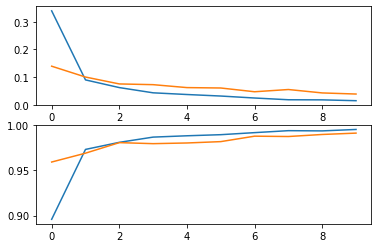

In [9]:
results2 = model2.evaluate(X_test, Y_test)
print('test loss, test acc:', results2)

fig, (plt1, plt2) = plt.subplots(2,1)

plt1.plot(history2.history["loss"])
plt1.plot(history2.history["val_loss"])

plt2.plot(history2.history["accuracy"])
plt2.plot(history2.history["val_accuracy"])
plt.show()

By using `relu` instead of `tanh` and `MaxPool` instead of `AvgPool` the accuracy goes up to `99.13%` from `98.30%` and the loss goes down to `0.0389` from `0.0533`

This is not a big change.